In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creating random series

In [8]:
np.random.seed(1234)

s1 = pd.Series(np.random.normal(loc=0, scale=10, size=1000), name="s1") # scale here is the standard deviation
s2 = pd.Series(2*s1 + np.random.normal(loc=60, scale=15, size=1000), name="s2")

Plotting a histogram of the series

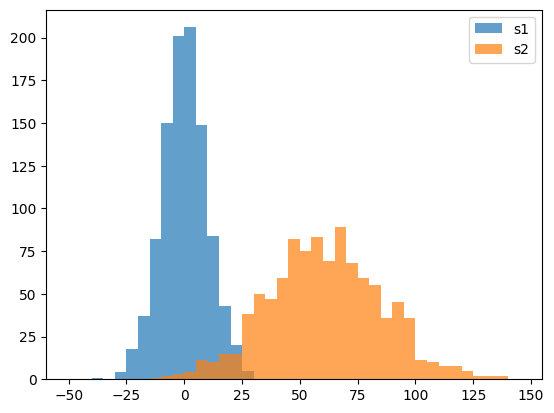

In [9]:
plt.figure()
plt.hist(s1, alpha=0.7, bins=np.arange(-50, 150, 5), label="s1")
plt.hist(s2, alpha=0.7, bins=np.arange(-50, 150, 5), label="s2")
# alpha is set to 0.7 so that the plots dont overlay
# it is recommended to determine the bins in the function so that it doesnt show different set of bind for each histogram

plt.legend();

Comparing the series to a new one

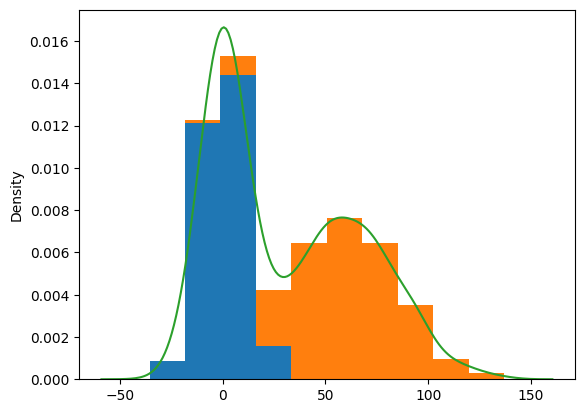

In [13]:
plt.figure()
plt.hist([s1, s2], histtype="barstacked", density=True) # probability density function
# histtype was used just to make the plot look good

s3 = np.concatenate((s1, s2))
sns.kdeplot(s3);

C:\Users\thoma\AppData\Local\Temp\ipykernel_4348\2061002528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s3, hist_kws={"color": "Teal"}, kde_kws={"color": "Navy"});


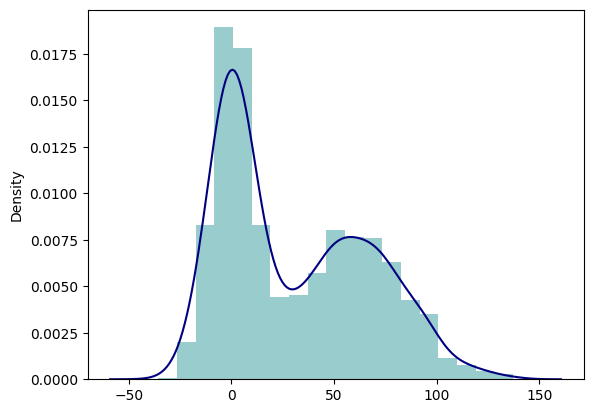

In [14]:
plt.figure()
sns.distplot(s3, hist_kws={"color": "Teal"}, kde_kws={"color": "Navy"});

A new type of plot: jointplot

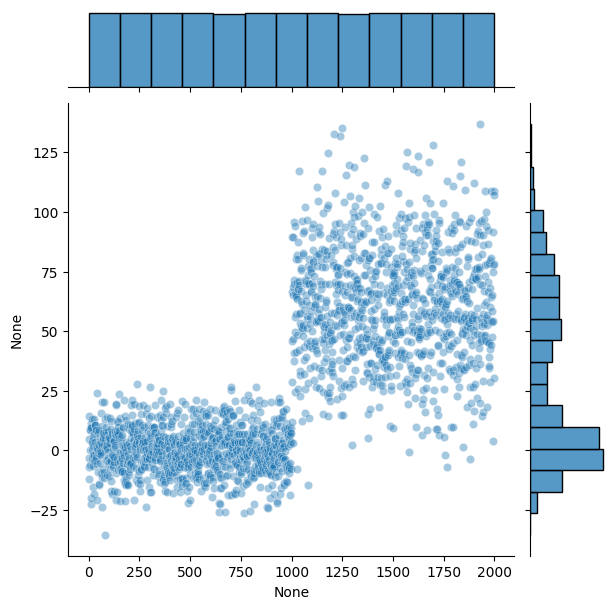

In [18]:
sns.jointplot(s3, alpha=0.4); # alpha=0.4 help us visualize the plot better

The data can be visualized as dots, as seen, but also as hexagons

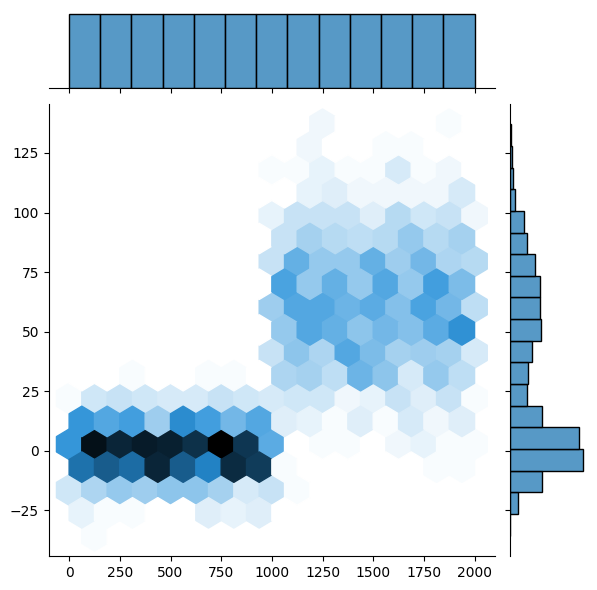

In [21]:
sns.jointplot(s3, kind="hex");

And as a kde distribution

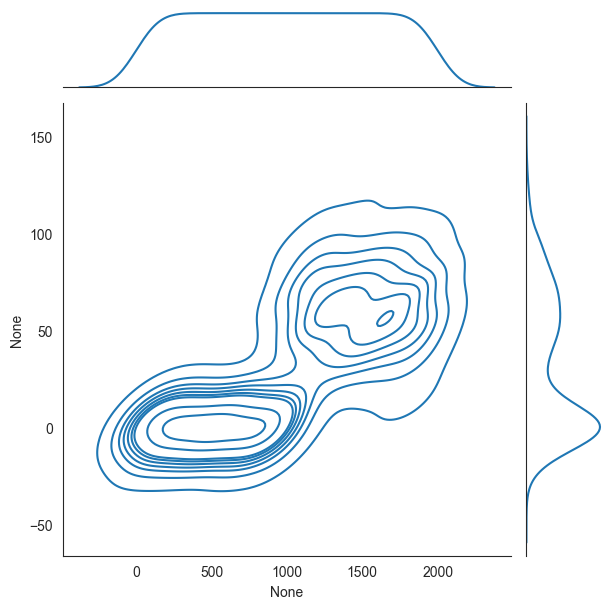

In [28]:
sns.jointplot(s3, kind="kde");

Now testing some sns plots with the iris dataset

In [29]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Pairplot generates a simple yet complex plot showing the relations between each column from the dataset as a scatterplot, except from the diagonal plots, which are represented as a kde distribution

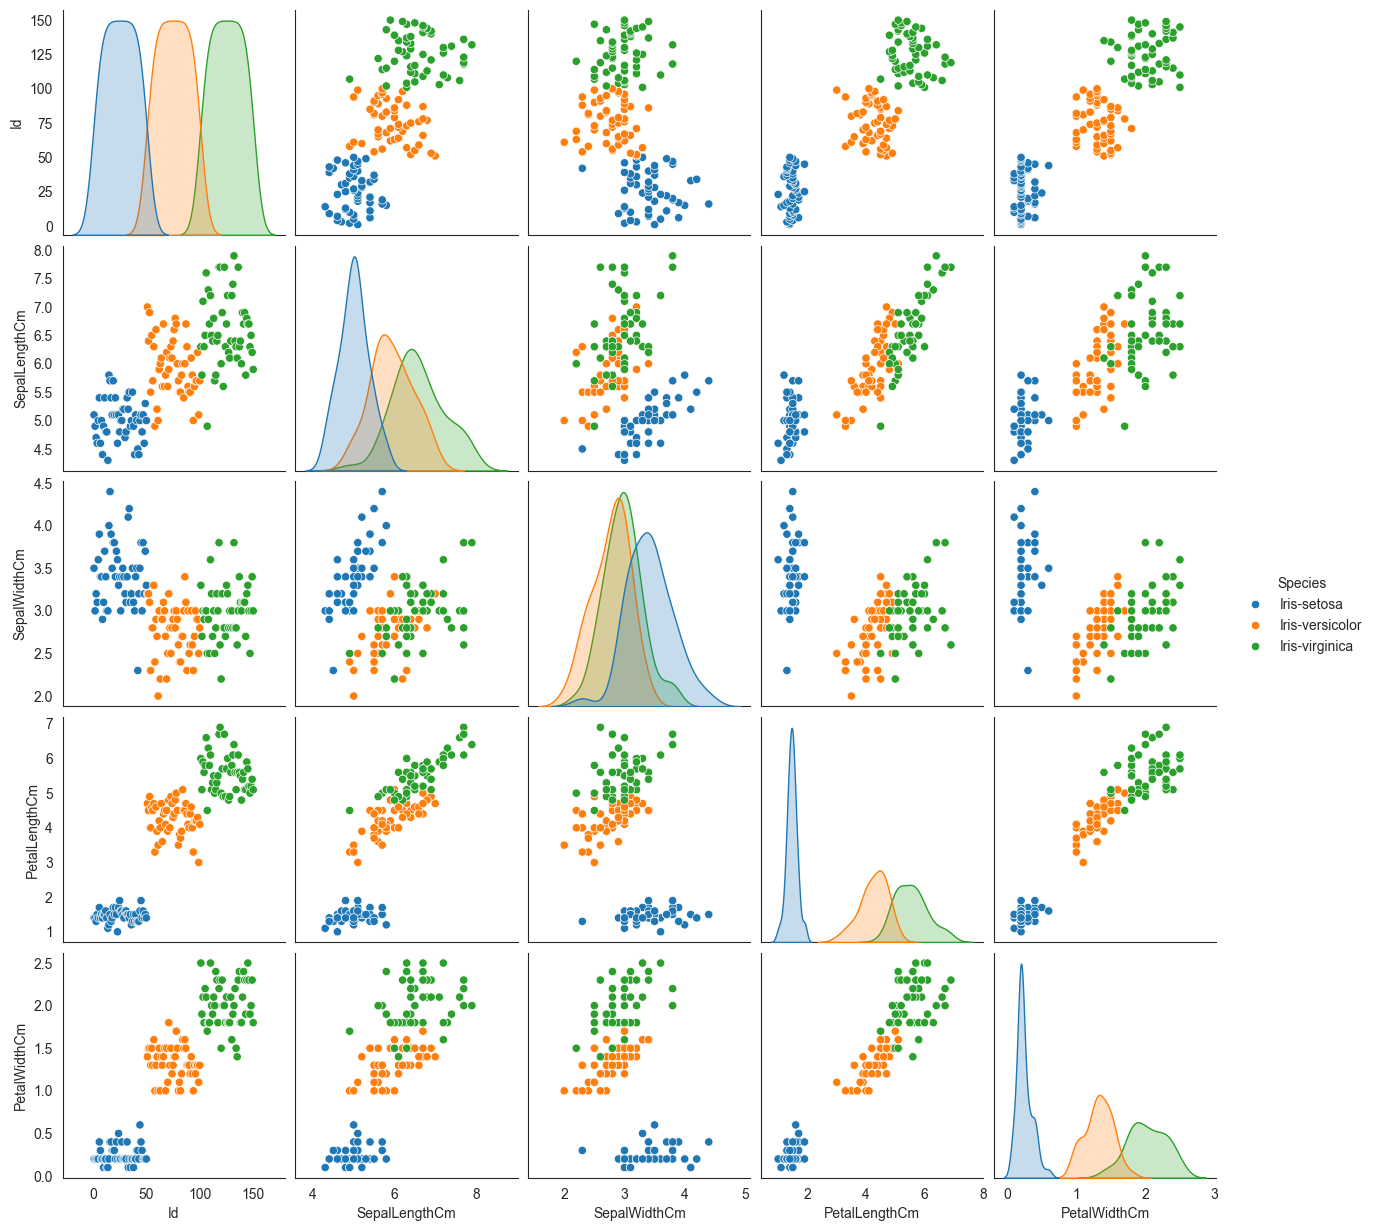

In [37]:
sns.pairplot(iris, hue="Species", diag_kind="kde");
# hue="Species" states that the colors must change according to the name column, that is, the legend will be the species
# diag_kind="kde" sets the plots in the diagonal to kde

Exploring the swarmplot and violinplot, interesting additions to the seaborn library

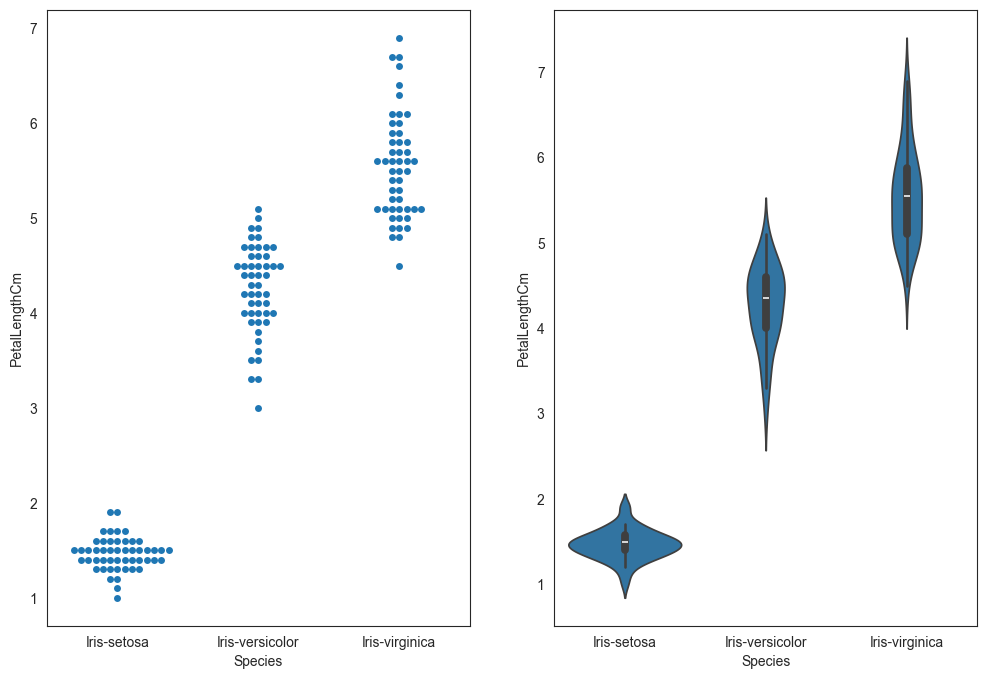

In [35]:
plt.figure(figsize=(12, 8)) # so as the text don't overlay

plt.subplot(1, 2, 1)
sns.swarmplot(x="Species", y="PetalLengthCm", data=iris)

plt.subplot(1, 2, 2)
sns.violinplot(x="Species", y="PetalLengthCm", data=iris); # mixes boxplot and kde